# Final Project of Introduction to Bioinformatics

## Comparative Mitochondrial Genomics and Phylogenetic Analysis



This task focuses on the comparative analysis of mitochondrial genomes from different species, primarily birds, mammals, and insects. The aim is to understand the evolutionary relationships between these species by analyzing and comparing their mitochondrial DNA, which is about 16,000 base pairs in length. You will use advanced computational methods to construct phylogenetic trees and delve into the ecological and anthropological insights that can be gleaned from this data. This project is designed to provide a comprehensive understanding of mitochondrial genomics, its importance in evolutionary biology, and its applications in broader scientific contexts.

You will learn:

- Techniques for aligning and comparing mitochondrial DNA sequences.
- How to construct and interpret phylogenetic trees using advanced computational methods.
- The application of mitochondrial genomics in understanding ecological interactions and human evolutionary history.

#### Task Roadmap

1. **Mitochondrial Genome Comparison**:
   - Align mitochondrial DNA sequences from the provided dataset.
   - Analyze these sequences to identify similarities and differences across species.

2. **Phylogenetic Analysis Using Advanced Methods**:
   - Apply Maximum Likelihood (ML) and Bayesian Inference methods, utilizing tools like `ETE Toolkit`, `DendroPy`, `BEAST`, or `PyRate`.
   - Compare the trees generated by these methods to understand how different approaches can lead to different interpretations of the data.

3. **Cross-Disciplinary Applications (Bonus)**:
   - **Ecology**: Examine how mitochondrial DNA analysis can reveal information about species adaptation, migration, and conservation. This involves understanding how genetic variation within and between species can inform ecological strategies and conservation efforts.
   - **Anthropology**: Investigate the use of mitochondrial DNA in tracing human evolution and migration patterns. This includes studying the mitochondrial DNA of mammals in your dataset to draw parallels with human evolutionary studies.

### Data Sources

The mitochondrial DNA data for birds, mammals, and insects will be provided to you. This dataset has been curated to facilitate a comprehensive comparative analysis and is essential for the completion of your phylogenetic studies.

### Useful Resources and Material

- [Mitochondrial DNA - Wikipedia](https://en.wikipedia.org/wiki/Mitochondrial_DNA): A general introduction to the structure, function, origin, and diversity of mitochondrial DNA, as well as its applications in various fields such as medicine, forensics, and anthropology.
- [Mitochondrial DNA Analysis: Introduction, Methods, and Applications](https://bioinfo.cd-genomics.com/mitochondrial-dna-analysis-introduction-methods-and-applications.html): An explanation of the basics of mitochondrial DNA sequencing, bioinformatics analysis, heteroplasmy, and advantages of mitochondrial DNA analysis over nuclear DNA analysis.
- [Phylogenetic Tree- Definition, Types, Steps, Methods, Uses - Microbe Notes](https://microbenotes.com/phylogenetic-tree/): A coverage of the concepts and methods of phylogenetic tree construction, including the types of phylogenetic trees, the steps involved in phylogenetic analysis, the main methods of phylogenetic inference, and the applications of phylogenetic trees in various disciplines.
- [Phylogenetics - Wikipedia](https://en.wikipedia.org/wiki/Phylogenetics): An overview of the field of phylogenetics, which is the study of the evolutionary history and relationships among or within groups of organisms. It also discusses the data sources, models, algorithms, software, and challenges of phylogenetic analysis.
- [ETE Toolkit](http://etetoolkit.org/): A Python library for manipulating, analyzing, and visualizing phylogenetic trees. It supports various formats, methods, and tools for phylogenetic analysis, such as alignment, tree inference, tree comparison, tree annotation, and tree visualization.
- [DendroPy](https://dendropy.org/): Another Python library for phylogenetic computing. It provides a comprehensive API for working with phylogenetic data structures, such as trees, characters, and networks. It also offers a rich set of functions for simulation, manipulation, analysis, and annotation of phylogenetic data.

### Exploration and Reflection

As we proceed with our analysis of mitochondrial DNA for phylogenetic tree construction, it is valuable to contemplate a few questions. These inquiries aim to facilitate a more thorough understanding of the roles and characteristics of mitochondrial DNA in the context of evolutionary biology:

1. **Maternal Inheritance and Its Implications**: How does the maternal inheritance of mitochondrial DNA simplify our understanding of evolutionary lineage compared to nuclear DNA, which undergoes recombination? What unique insights can this aspect provide in tracing the evolutionary history of species?

2. **Mutation Rate and Evolutionary Insights**: Mitochondrial DNA mutates at a faster rate than nuclear DNA. How does this characteristic make mtDNA a more sensitive tool for detecting recent evolutionary events and relationships among closely related species? Can you think of any specific scenarios or studies where this property of mtDNA has been particularly instrumental?

Reflect on these questions as you work through the project, and consider how the properties of mitochondrial DNA enhance its value and applicability in evolutionary biology and beyond. Provide your answer either in this notebook, or in your report (if you had one).

<blockquote style="font-family:Arial; color:black; font-size:16px; border-left:0px solid red; padding: 10px;">
1- Mitochondrial DNA (mtDNA) is inherited exclusively from the mother.With maternal inheritance, the mtDNA sequence remains relatively consistent over generations. This uniparental inheritance simplifies the tracking of evolutionary lineages compared to nuclear DNA, which undergoes recombination, blending genetic material from both parents. This lack of recombination preserves the original maternal mtDNA sequence, providing a clearer snapshot of maternal genetic history.

2- Mitochondrial DNA exhibits a higher mutation rate compared to nuclear DNA. This accelerated mutation rate results in more frequent genetic changes over time. The fast mutation rate makes mtDNA a powerful tool for detecting recent evolutionary events. Small genetic variations accumulate rapidly, allowing researchers to discern recent divergence and evolutionary changes within populations. In studies involving closely related species, mtDNA provides a finer resolution due to its rapid mutation rate.

</blockquote>

### Step 0: Installing Necessary Packages

In [13]:
import sys
import subprocess
import pkg_resources

def install(package):
    subprocess.check_call([sys.executable, "-m", "pip", "install", package])

REQUIRED_PACKAGES = [
    'biopython',
    'pandas',
    'numpy'
]

for package in REQUIRED_PACKAGES:
    try:
        dist = pkg_resources.get_distribution(package)
        print('{} ({}) is installed'.format(dist.key, dist.version))
    except pkg_resources.DistributionNotFound:
        print('{} is NOT installed'.format(package))
        install(package)
        print('{} was successfully installed.'.format(package))

biopython (1.83) is installed
pandas (1.5.3) is installed
numpy (1.23.5) is installed


In [14]:
# Import necessary libraries.
import pandas as pd
import numpy as np

### Step 1: Dataset Expansion

Our first task is to augment our dataset with additional species. This involves engaging with the NCBI database to retrieve mitochondrial DNA sequences.

#### Instructions:

- **Species Selection**: Identify and choose 10 additional species to include in your dataset. Aim for a diverse selection to enrich your phylogenetic analysis.

- **Querying NCBI Database**: Use the NCBI database to locate mitochondrial DNA sequences for your chosen species. While you can manually search on the [NCBI website](https://www.ncbi.nlm.nih.gov/), consider automating this process through their API for a more efficient approach.
    - **Example Query**: As a starting point, you might use a query like `"mitochondrion[Filter] AND (your_species_name[Organism])` to find specific mtDNA sequences. Adjust the query parameters according to your species selection.
    - **Documentation**: Familiarize yourself with the [NCBI API documentation](https://www.ncbi.nlm.nih.gov/books/NBK25497/) for detailed guidance on constructing queries.

- **Using NCBI Website**: You are welcome to use the NCBI website for this task. If you do so, document each step of your process clearly in your task report. This should include the species names, search terms used, and how you determined the relevant sequences to include.

- **Bonus Opportunity**: Implementing an automated, methodological approach using the NCBI API and relevant Python packages to add all 10 records in your dataset will earn you a 50% bonus for this section. Your method should be structured and replicable, demonstrating a systematic approach to data collection.

Remember, the goal is to methodically expand your dataset with relevant mtDNA sequences, paving the way for insightful phylogenetic analysis.

In [15]:
dataset = pd.read_csv('species.csv')

dataset.head()

,taxo_id,specie,blast_name,genbank_common_name,accession_number,mtDNA
0,8945,Eudynamys scolopaceus,birds,Asian koel,NC_060520,https://www.ncbi.nlm.nih.gov/nucleotide/NC_060...
1,7460,Apis mellifera,Bees,honey bee,NC_051932,https://www.ncbi.nlm.nih.gov/nucleotide/NC_051...
2,36300,Pelecanus crispus,birds,Dalmatian pelican,OR620163,https://www.ncbi.nlm.nih.gov/nuccore/OR620163.1
3,10116,Rattus norvegicus,Rodents,Norway rat,NC_001665,https://www.ncbi.nlm.nih.gov/nuccore/NC_001665
4,9031,Gallus gallus,birds,Gallus gallus,NC_053523,https://www.ncbi.nlm.nih.gov/nuccore/NC_053523.1


In [16]:
from Bio import Entrez

# Set your email (required for NCBI Entrez API)
Entrez.email = "your_email@example.com"

additional_species = [
    "Daphnia pulex",
    "Ursus americanus",
    "Mantis religiosa",
    "Cygnus olor",
    "Elephas maximus",
    "Ailurus fulgens",
    "Dendrobates tinctorius",
    "Orcinus orca",
    "Macropus giganteus",
    "Spheniscus magellanicus"
    ]

def fetch_mtDNA_info(species):
    handle = Entrez.esearch(db="taxonomy", term=species)
    record = Entrez.read(handle)

    taxo_id = record["IdList"][0] if record["IdList"] else None

    if taxo_id:
        taxonomy_handle = Entrez.efetch(db="taxonomy", id=taxo_id, retmode="xml")
        taxonomy_record = Entrez.read(taxonomy_handle)[0]
        scientific_name = taxonomy_record["ScientificName"]
        genbank_common_name = taxonomy_record.get("OtherNames", {}).get("GenbankCommonName", "N/A")
        blast_name = genbank_common_name # it's not important

        genbank_handle = Entrez.esearch(db="nucleotide", term=f"{scientific_name} mitochondrial genome", retmax=1)
        genbank_record = Entrez.read(genbank_handle)
        accession_number = genbank_record["IdList"][0] if genbank_record["IdList"] else None
        taxonomy_handle = Entrez.efetch(db="nucleotide", id=accession_number, retmode="xml", rettype="gb")
        taxonomy_record = Entrez.read(taxonomy_handle)[0]
        accession_number = taxonomy_record['GBSeq_locus']
        mtDNA = f"https://www.ncbi.nlm.nih.gov/nuccore/{accession_number}"

        return taxo_id, scientific_name, blast_name, genbank_common_name, accession_number, mtDNA


for species in additional_species:
    taxo_id, specie, blast_name, genbank_common_name, accession_number, mtDNA_url = fetch_mtDNA_info(species)
    if taxo_id:
        dataset = dataset.append({"taxo_id": taxo_id, "specie": specie, "blast_name": blast_name,
                                  "genbank_common_name": genbank_common_name, "accession_number": accession_number,
                                  "mtDNA": mtDNA_url}, ignore_index=True)

# Save the expanded dataset to a CSV file
dataset.to_csv('expanded_dataset.csv', index=False)

<ipython-input-16-3f6629502be2>:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataset = dataset.append({"taxo_id": taxo_id, "specie": specie, "blast_name": blast_name,
<ipython-input-16-3f6629502be2>:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataset = dataset.append({"taxo_id": taxo_id, "specie": specie, "blast_name": blast_name,
<ipython-input-16-3f6629502be2>:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataset = dataset.append({"taxo_id": taxo_id, "specie": specie, "blast_name": blast_name,
<ipython-input-16-3f6629502be2>:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataset = dataset.append({"taxo_id": taxo_id, 

#### Checking Data Consistency

The code block is designed to check the accuracy of a biological dataset. It examines each entry in a CSV file, focusing on taxonomy IDs, species names, GenBank accession numbers, and mitochondrial DNA links. It uses the NCBI's Entrez system to ensure taxonomy IDs correspond to the correct species and confirms the mitochondrial DNA links are accurate. The script also checks GenBank accession numbers against the provided links. This method is useful for maintaining the accuracy of current data and **might help in adding new entries to the database.**

In [17]:
import pandas as pd
import requests
from Bio import Entrez
import os
from io import BytesIO
from requests.adapters import HTTPAdapter
from urllib3.util.retry import Retry

# Set your email and API key for NCBI
entrez_email = os.getenv('ENTREZ_EMAIL')
entrez_key = os.getenv('ENTREZ_API_KEY')
Entrez.email = entrez_email

def fetch_entrez_record(db, id, rettype, retmode):
    """Fetch record from NCBI Entrez with retries."""
    url = f"https://eutils.ncbi.nlm.nih.gov/entrez/eutils/efetch.fcgi?db={db}&id={id}&rettype={rettype}&retmode={retmode}"
    session = requests.Session()
    retries = Retry(total=5, backoff_factor=1, status_forcelist=[502, 503, 504])
    session.mount('https://', HTTPAdapter(max_retries=retries))

    try:
        response = session.get(url)
        response.raise_for_status()
        if db == "nucleotide":
            return response.text
        return response.content
    except requests.exceptions.HTTPError as err:
        print(f"HTTP error: {err}")
    except requests.exceptions.ConnectionError as err:
        print(f"Connection error: {err}")
    return None

def verify_taxonomy_id(taxo_id, species_name):
    """Verify taxonomy ID against species name."""
    xml_data = fetch_entrez_record("taxonomy", taxo_id, "xml", "xml")
    if xml_data:
        # Convert bytes data to a binary file-like object
        xml_data_io = BytesIO(xml_data)
        records = Entrez.read(xml_data_io)
        return records[0]['ScientificName'].lower() == species_name.lower()
    return False

def verify_mitochondrial_dna(accession_number):
    gb_data = fetch_entrez_record("nucleotide", accession_number, "gb", "text")
    return "mitochondrion" in gb_data.lower() if gb_data else False

def extract_accession_from_link(link):
    return link.split('/')[-1].split('.')[0]

def check_dataset_consistency(file_path):
    species_df = pd.read_csv(file_path)

    for index, row in species_df.iterrows():
        taxonomy_id = str(row['taxo_id'])
        species_name = row['specie']
        accession_number = row['accession_number']
        mtDNA_link = row['mtDNA']
        extracted_accession = extract_accession_from_link(mtDNA_link)

        taxonomy_check = verify_taxonomy_id(taxonomy_id, species_name)
        accession_match = (accession_number == extracted_accession)
        mitochondrial_check = verify_mitochondrial_dna(accession_number)

        print(f"Row {index}: Taxonomy Check: {taxonomy_check}, Accession Match: {accession_match}, Mitochondrial Check: {mitochondrial_check}")


In [61]:
check_dataset_consistency('expanded_dataset.csv')

Row 0: Taxonomy Check: True, Accession Match: True, Mitochondrial Check: True
Row 1: Taxonomy Check: True, Accession Match: True, Mitochondrial Check: True
Row 2: Taxonomy Check: True, Accession Match: True, Mitochondrial Check: True
Row 3: Taxonomy Check: True, Accession Match: True, Mitochondrial Check: True
Row 4: Taxonomy Check: True, Accession Match: True, Mitochondrial Check: True
Row 5: Taxonomy Check: True, Accession Match: True, Mitochondrial Check: True
Row 6: Taxonomy Check: True, Accession Match: True, Mitochondrial Check: True
Row 7: Taxonomy Check: True, Accession Match: True, Mitochondrial Check: True
Row 8: Taxonomy Check: True, Accession Match: True, Mitochondrial Check: True
Row 9: Taxonomy Check: True, Accession Match: True, Mitochondrial Check: True
Row 10: Taxonomy Check: True, Accession Match: True, Mitochondrial Check: True
Row 11: Taxonomy Check: True, Accession Match: True, Mitochondrial Check: True
Row 12: Taxonomy Check: True, Accession Match: True, Mitochond

### Step 3: Sequence Download and Preparation

The next step in our project involves downloading the mitochondrial DNA sequences for each species and preparing them for analysis.

#### Instructions:

- **Download mtDNA Sequences**: Write a script to download the mtDNA sequences from the links provided in your dataset. The sequences should be in FASTA format, which is the standard for nucleotide sequences.

- **Sequence Labeling**: Properly label each sequence within the FASTA file. This header, starting with '>', should include the species name and any other relevant information (e.g., `>Eudynamys_scolopaceus_NC_060520`). This is crucial for identifying the sequences in subsequent analysis.

- **Concatenate Sequences**:
    - Create a script to concatenate all downloaded sequences into a single `.fasta` or `.fna` file.
    - Ensure each sequence in the file is clearly separated by its header line, which is important for differentiating the sequences of various species.

#### Tips for Writing the Download and Concatenation Script:
- Use Python libraries such as `httpx` or `requests`, or any other tool you prefer for downloading sequences. For processing FASTA files you can use a wide range of tools. One recommended option is `Biopython` library.
- Use a loop to go through each link in the dataset, download the sequence, and append it to your concatenated file.
- Maintain the format integrity of the FASTA file, ensuring each sequence is correctly associated with its header.


In [19]:
from Bio import SeqIO

def download_mtDNA(url, label):
    id = url.split("/")[-1]
    handle = Entrez.efetch(db="nucleotide", id=id, rettype="fasta", retmode="text")
    return ('>' + label + '\n' + str(SeqIO.read(handle, "fasta").seq) + '\n')

file = open('fasta_seq.fasta', 'w')

for index, row in dataset.iterrows():
    label = row['accession_number']
    file.write(download_mtDNA(row['mtDNA'], label))

file.close()

/usr/local/lib/python3.10/dist-packages/Bio/Entrez/__init__.py:723: UserWarning: 
            Email address is not specified.

            To make use of NCBI's E-utilities, NCBI requires you to specify your
            email address with each request.  As an example, if your email address
            is A.N.Other@example.com, you can specify it as follows:
               from Bio import Entrez
               Entrez.email = 'A.N.Other@example.com'
            In case of excessive usage of the E-utilities, NCBI will attempt to contact
            a user at the email address provided before blocking access to the
            E-utilities.
  warnings.warn(


### Step 4: Sequence Alignment

After downloading the mitochondrial DNA sequences, the next critical step is their alignment. This process allows us to compare the sequences and discern the evolutionary relationships among the species.

#### Instructions:

- **Select an Alignment Tool**: Choose one of the following alignment tools based on your project needs. Each tool has its strengths and is widely used in bioinformatics for multiple sequence alignment.

1. **MAFFT**:
    - **Brief Introduction**: MAFFT (Multiple Alignment using Fast Fourier Transform) is renowned for its speed and efficiency, particularly suitable for large datasets.
    - **Resources**:
        - [MAFFT Official Documentation](https://mafft.cbrc.jp/alignment/software/)
        - [Example Usage on GitHub](https://github.com/MountainMan12/SARS-Cov2-phylo)
        - [Relevant Notebook](https://colab.research.google.com/github/pb3lab/ibm3202/blob/master/tutorials/lab03_phylo.ipynb)

2. **Clustal Omega**:
    - **Brief Introduction**: Clustal Omega offers high-quality alignments and is user-friendly, ideal for those new to sequence alignment.
    - **Resources**:
        - [A Python wrapper around Clustal Omega](https://github.com/benchling/clustalo-python)
        - [Clustal Omega Official Website](http://www.clustal.org/omega/)

3. **MUSCLE**:
    - **Brief Introduction**: MUSCLE (Multiple Sequence Comparison by Log-Expectation) is known for its balance between speed and accuracy, making it a versatile choice for various datasets.
    - **Resources**:
        - [MUSCLE Documentation](https://drive5.com/muscle5/manual/)

- **Perform Sequence Alignment**: Utilize your chosen tool to align the downloaded mtDNA sequences. This alignment is foundational for the accurate construction of phylogenetic trees.

- **Save Aligned Sequences**: After alignment, save the output in an appropriate format for further analysis in the subsequent steps of this project.

In [20]:
!apt-get install -qq -y mafft
from Bio.Align.Applications import MafftCommandline
from Bio import AlignIO

def perform_alignment(input_file, output_file):
    mafft = MafftCommandline(input=input_file)
    stdout, stderr = mafft()
    with open("aligned.fasta", "w") as handle:
        handle.write(stdout)
    align = AlignIO.read("aligned.fasta", "fasta")
    return align

align = perform_alignment("fasta_seq.fasta", "aligned.fasta")

/bin/bash: /usr/local/lib/libtinfo.so.6: no version information available (required by /bin/bash)


### Step 5: Phylogenetic Tree Construction

The next phase in our project involves constructing phylogenetic trees to visualize and analyze the evolutionary relationships among the species. We will use three distinct methods, each providing unique insights.

#### Phylogenetic Tree Construction Methods:

1. **Bayesian Inference Trees**:
    - **Overview**: This method uses Bayesian statistics to estimate the likelihood of different evolutionary histories. It's particularly useful for its ability to estimate branch lengths and support values.
    - **Tools**: MrBayes, BEAST
        - MrBayes ([Official Website](https://nbisweden.github.io/MrBayes/manual.html/)) is widely recognized for its robustness in Bayesian inference.
        - BEAST2 ([BEAST Software](https://www.beast2.org/)) is another powerful tool, offering advanced features for complex evolutionary models.

2. **Maximum Likelihood Trees**:
    - **Overview**: Maximum Likelihood methods evaluate tree topologies based on the likelihood of observed data given a tree model. It's known for its statistical rigor and accuracy.
    - **Tools**: RAxML, PhyML
        - RAxML ([RAxML GitHub](https://github.com/stamatak/standard-RAxML)) is preferred for large datasets due to its efficiency.
        - PhyML ([PhyML Documentation](http://www.atgc-montpellier.fr/phyml/)) offers a balance of speed and accuracy, with a user-friendly interface.

3. **Neighbor-Joining Trees**:
    - **Overview**: The Neighbor-Joining method is a distance-based approach that constructs phylogenetic trees by evaluating the genetic distance between sequences. It is known for its speed and simplicity, making it well-suited for initial exploratory analyses.
    - **Tools**:
        - MEGA: A versatile tool specifically used here for constructing Neighbor-Joining trees. It's recognized for its ease of use and effectiveness in phylogenetic analysis. [MEGA Software](https://www.megasoftware.net/)


In [21]:
!pip install -q condacolab
import condacolab
condacolab.install_miniconda()

!conda install -c bioconda raxml-ng modeltest-ng --yes

/bin/bash: /usr/local/lib/libtinfo.so.6: no version information available (required by /bin/bash)
✨🍰✨ Everything looks OK!
/bin/bash: /usr/local/lib/libtinfo.so.6: no version information available (required by /bin/bash)
Solving environment: - \ | / - \ | / - \ | / - \ | done


==> WARNING: A newer version of conda exists. <==
  current version: 23.7.4
  latest version: 24.1.0

Please update conda by running

    $ conda update -n base -c defaults conda

Or to minimize the number of packages updated during conda update use

     conda install conda=24.1.0



# All requested packages already installed.



/bin/bash: /usr/local/lib/libtinfo.so.6: no version information available (required by /bin/bash)

ERROR: Result files for the run with prefix `aligned.fasta` already exist!
Please either choose a new prefix, remove old files, or add --redo command line switch to overwrite them.



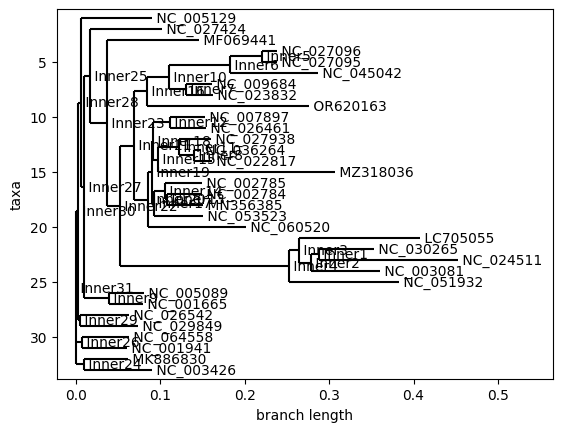

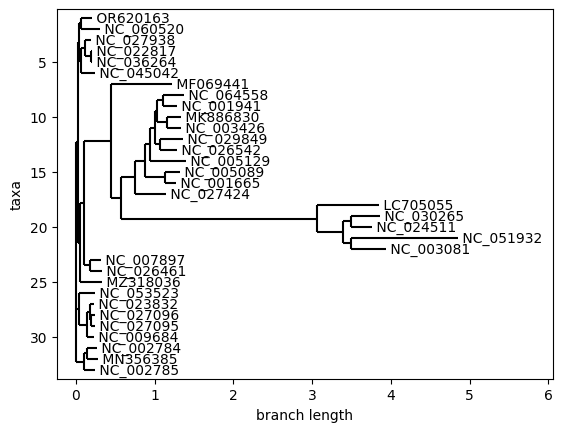

In [22]:
from Bio import Phylo
from Bio.Phylo.TreeConstruction import DistanceCalculator, DistanceTreeConstructor


def construct_tree_NJ(aligned_sequences):

  calculator = DistanceCalculator('identity')
  dm = calculator.get_distance(aligned_sequences)
  constructor = DistanceTreeConstructor(calculator, 'nj')
  nj_tree = constructor.build_tree(aligned_sequences)

  Phylo.draw(nj_tree, do_show=False)
  Phylo.write(nj_tree, 'NJtree_output.xml' , 'phyloxml')
  return nj_tree

def construct_tree_ML(aligned_sequences):
    # !modeltest-ng -i aligned.fasta -d aa
    # !raxml-ng --msa aligned.fasta --model LG+G4 --prefix T1 --threads 2
    !raxml-ng --search1 --msa aligned.fasta --model GTR+G
    tree = Phylo.read("aligned.fasta.raxml.bestTree", "newick")

    Phylo.draw(tree, do_show=False)
    Phylo.write(tree, 'MLtree_output.xml' , 'phyloxml')
    return tree


nj_tree = construct_tree_NJ(align)
ml_tree = construct_tree_ML(align)

In [ ]:
# def construct_tree_BI(gene_trees):
    # Implement the construction of a tree using bayes inference

# for this part I used mrbayes.
# first of all with Mesquite, I made a .nex file that is appropriate for mrbayes then by the commands that shown below, the tree was made.
# sudo apt-get -y install mrbayes (install mrbayes)
# mb (run)
# execute lastOne.fasta.nex
# At last, we can see the tree in the file "lastOne.fasta.nex.con.tre"


### Step 6: In-Depth Phylogenetic Tree Visualization

Having constructed phylogenetic trees using different methods, our next task is to visualize these trees effectively. This step is crucial for interpreting the results and communicating our findings.

#### Visualization Tools:

1. **FigTree**:
    - **Overview**: FigTree is designed for the graphical representation of phylogenetic trees. It's excellent for creating publication-ready visualizations.
    - **Resource**: [FigTree Tool](http://tree.bio.ed.ac.uk/software/figtree/)
    - **Usage**: Use FigTree to add detailed annotations, adjust branch colors, and format tree layouts for clear, interpretable visualizations.

2. **iTOL (Interactive Tree Of Life)**:
    - **Overview**: iTOL is a web-based tool for the display, annotation, and management of phylogenetic trees, offering extensive customization options.
    - **Resource**: [iTOL Website](https://itol.embl.de/)
    - **Usage**: Ideal for interactive tree visualizations. It allows users to explore different layers of data through their tree, such as adding charts or color-coding branches.

3. **Dendroscope**:
    - **Overview**: Dendroscope is a software program for viewing and editing phylogenetic trees, particularly useful for large datasets.
    - **Resource**: [Dendroscope Download](https://uni-tuebingen.de/fakultaeten/mathematisch-naturwissenschaftliche-fakultaet/fachbereiche/informatik/lehrstuehle/algorithms-in-bioinformatics/software/dendroscope/)
    - **Usage**: Utilize Dendroscope when dealing with large and complex trees or when you need to compare multiple trees side-by-side.

#### Task:

- **Visualize Each Tree**: Use one or more of the above tools to visualize the phylogenetic trees you constructed using Bayesian inference, maximum likelihood, and neighbor-joining methods.
- **Highlight Differences**: Focus on highlighting the differences and similarities between the trees obtained from the different methods. Pay attention to tree topology, branch lengths, and any notable patterns.
- **Interpretation and Presentation**: Aim for visualizations that are not only accurate but also interpretable and visually appealing. This will enhance the clarity of your work.

In [23]:
# for this task I use the iTol website and the links are the output of for each tree

# https://itol.embl.de/tree/5208113228488351707410666   (NJ)
# https://itol.embl.de/tree/5208113228489261707410689   (ML)
# https://itol.embl.de/tree/5208113228490221707410723   (BI)

### Cross-Disciplinary Applications (Optional)

This is an optional part with bonus, relative to the depth of your analysis. Refer to the first part of this notebook. You have complete freedom to do this part anyway you like, but to gain a portion of the bonus score for this section, a bare minimum effort is required.

### Conclusion and Reflective Insights

As we conclude our exploration of phylogenetic tree construction and analysis, let's reflect on the insights learned from this task and consider questions that emerge from our findings.

#### Interpretation of Results:

- Reflect on the phylogenetic trees produced by each method (Bayesian inference, maximum likelihood, and neighbor-joining). Consider how the differences in tree topology might offer varied perspectives on the evolutionary relationships among the species.

#### Questions to Ponder:

1. **Species Divergence**: Based on the trees, which species appear to have the most ancient divergence? How might this information contribute to our understanding of their evolutionary history?
   
2. **Common Ancestors**: Are there any unexpected pairings or groupings of species that suggest a closer evolutionary relationship than previously thought? How could this reshape our understanding of these species' evolutionary paths?

3. **Methodology Insights**: Considering the discrepancies between the trees generated by different methods, what might this tell us about the limitations and strengths of each phylogenetic analysis method?

4. **Conservation Implications**: Considering the evolutionary relationships revealed in your phylogenetic analysis, what insights can be gained for conservation strategies? Specifically, how could understanding the close evolutionary ties between species, which might be facing distinct environmental challenges, guide targeted conservation efforts?

<blockquote style="font-family:Arial; color:black; font-size:16px; border-left:0px solid red; padding: 10px;">
    <strong>
    1- I think Pelecanus crispus has the most ancient divergence because longer branches, measured from the root to the tip of a particular species, indicate more time has passed since its divergence from a common ancestor.
    Knowledge of species with ancient divergence provides insights into their adaptation and evolution over extended periods.
    Understanding the ancient divergence of certain species contributes to our comprehension of their responses to environmental changes, speciation events, and the development of unique traits.
    </strong>
</blockquote>


 2- for example Orcinus orca(whale) and Ovis aries(sheep) have
  unexpected pariring.
  Unexpected pairings may prompt a reevaluation of the evolutionary relationships between species. It challenges previous assumptions and suggests that certain species may share a more recent common ancestor than anticipated.
  Closer relationships between species could provide insights into their biogeographic history, migration patterns, or shared ecological niches.

3-
Bayesian Inference Trees:
Bayesian methods offer a probabilistic framework, allowing for uncertainty estimation and incorporation of prior knowledge, but they can be computationally intensive and sensitive to model assumptions.

Maximum Likelihood Trees:
Maximum Likelihood is a robust and widely used method that provides statistical support for branch relationships, but it assumes homogeneous evolutionary rates and can be computationally demanding for large datasets.

Neighbor-Joining Tree:
Neighbor-Joining is a fast and simple method suitable for large datasets, but it may suffer from inaccuracies due to long-branch attraction and lacks statistical support for inferred relationships. It's best suited for preliminary analyses or when computational resources are limited.

4- Phylogenetic analysis highlights shared evolutionary traits among species, aiding targeted conservation. Recognizing common vulnerabilities or adaptations informs strategies for multiple species facing similar environmental challenges. Prioritizing preservation of common ancestors enhances biodiversity conservation and ecosystem resilience.